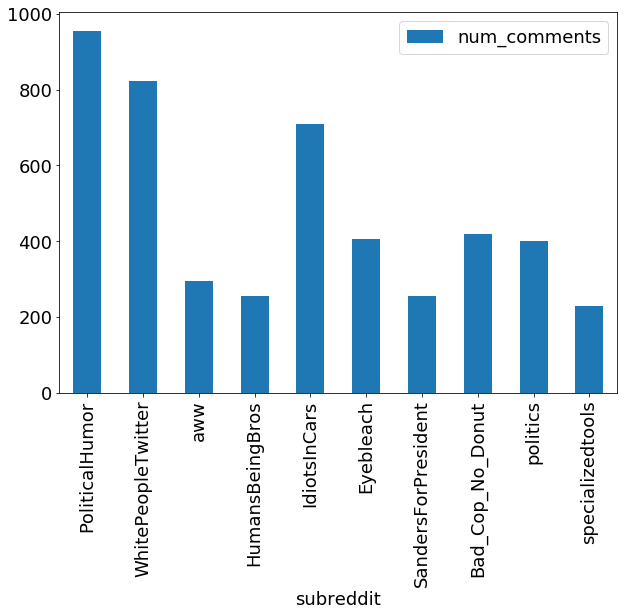

In [185]:
import pandas as pd
import praw
import chart_studio.plotly as py
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import json
from collections import Counter

matplotlib.rcParams.update({'font.size': 18})

secretKey = "Zj4X5Pv1aC-gFWYlk6CaJWSYyTc"
publicKey = "YQA1Qb-lfTEnzw"
userName = "bigDataProject"

reddit = praw.Reddit(client_id=publicKey, client_secret=secretKey, user_agent=userName)

posts = []
every_post = reddit.subreddit('all').hot(limit=10)
for post in every_post:
    posts.append([post.title, post.score, post.subreddit, post.num_comments])

posts = pd.DataFrame(posts,columns=['title', 'score', 'subreddit', 'num_comments'])

posts.plot(x='subreddit', y='num_comments', kind='bar', figsize=(10,7))

In [117]:
file = open('reddit-data.json','r')
data = pd.read_json(file, lines=True)
data

,author,name,id,time-created,locked,comments,is_original_content,num_of_comments,score,upvote_ratio
0,britbritinheels,Gay couple I am friends with heated pool have ...,ey57ef,02/03/20 04:29,False,[],False,0,1,1.0
1,VersieGans,Big Dick Tgirl Getting Pleased - SE10,ey57eg,02/03/20 04:29,False,[],False,0,1,1.0
2,CasualAstuteness,"Bartenders of reddit, what are some creative w...",ey57eh,02/03/20 04:29,False,[],False,0,0,0.5
3,sediceenlaweb,Rusia expulsará a los extranjeros contagiados ...,ey57ei,02/03/20 04:29,False,[],False,0,1,1.0
4,VersieGans,More White Cock Than She Expected - SE10,ey57ej,02/03/20 04:29,False,[],False,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
1242,PantyGirlXxX,"SKYPE/KIK @ babycakespanty for sessions, shows...",ey5yjh,02/03/20 05:43,False,[],False,0,1,1.0
1243,Tsquare43,[4282 x 3140]Fore part of the Soviet heavy cru...,ey5yjs,02/03/20 05:43,False,[],False,1,1,1.0
1244,ideatoresanket,Top Web Design Company & Digital marketing age...,ey5yjt,02/03/20 05:43,False,[],False,0,1,1.0
1245,ryokojoestar,VRChat WTF! moments 62 | Kromia Popstar (2020),ey5yju,02/03/20 05:43,False,[],False,0,1,1.0


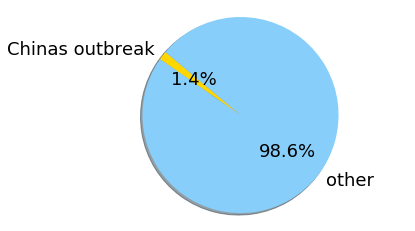

In [223]:
search_for = ['wuhan', 'china','China','Virus','Wuhan','virus', 'hongkong', 'HongKong','outbreak', 'korona', 'flu', 'sick', 'patient', 'patients']

virus = data[data['name'].str.contains('|'.join(search_for))]
labels = 'Chinas outbreak', 'other'
sizes = [len(virus), (len(data) - len(virus))]
colors = ['gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

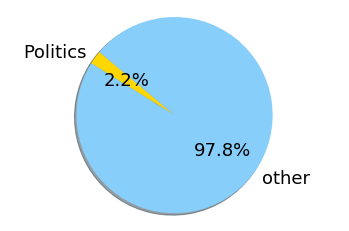

In [222]:
search_for = ['bernie','Bernie', 'trump','Trump', 'votes', 'Iowa','republicans','democrats', 'US', 'united states', 'America']

nfl = data[data['name'].str.contains('|'.join(search_for))]
labels = 'Politics', 'other'
sizes = [len(nfl), (len(data) - len(nfl))]
colors = ['gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

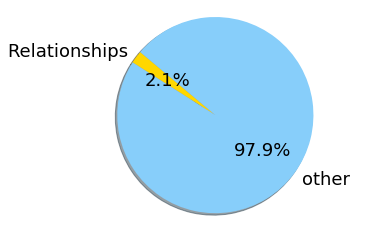

In [221]:
search_for = ['Crush', 'love','marriage', 'divorce', 'affair','cheating','relationship', 'friend', 'friendship', 'pal']

love_status = data[data['name'].str.contains('|'.join(search_for))]
labels = 'Relationships', 'other'
sizes = [len(love_status), (len(data) - len(love_status))]
colors = ['gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


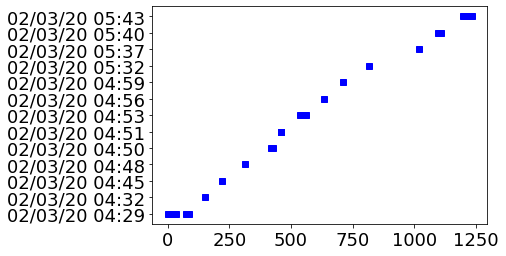

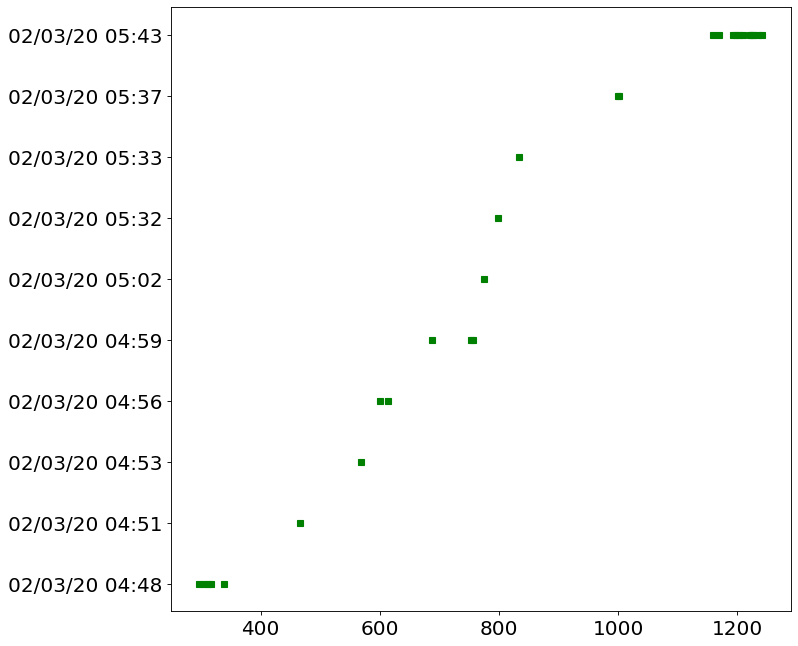

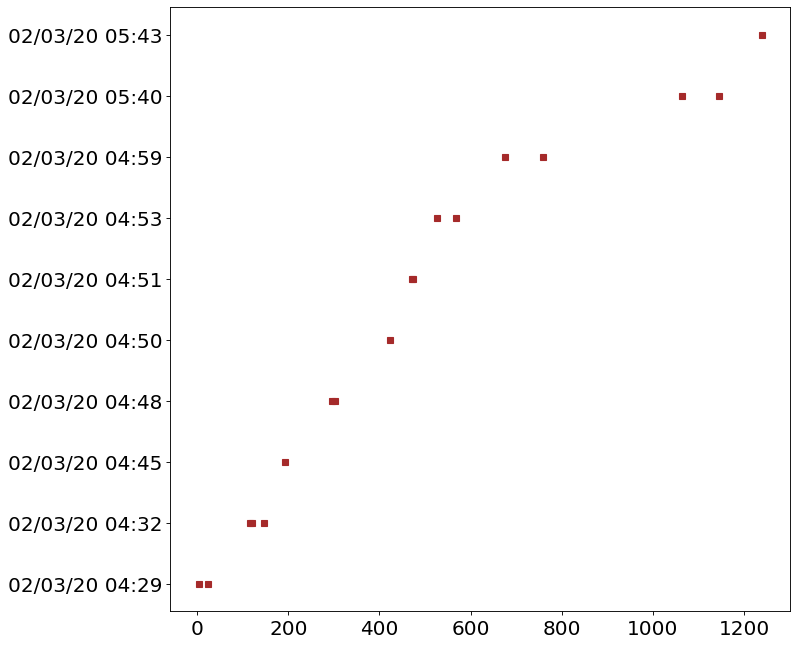

<Figure size 800x800 with 0 Axes>

In [178]:
plt.plot(love_status['time-created'],'s', color='blue', label='Relationships')
plt.figure(figsize=(10,10), dpi=80)
plt.plot(nfl['time-created'],'s', color='green', label='politics')
plt.figure(figsize=(10,10), dpi=80)
plt.plot(virus['time-created'],'s', color='brown', label='viruses')
plt.figure(figsize=(10,10), dpi=80)
plt.show()

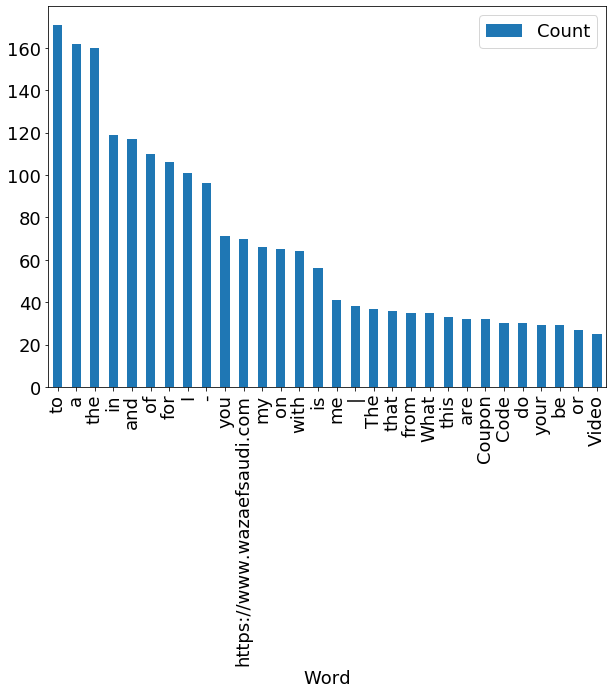

In [213]:
words = ['the', 'to', 'at', 'why','is']
word_count = Counter(" ".join(data["name"]).split()).most_common(30)
df = pd.DataFrame(word_count, columns= ["Word","Count"])
df.plot(x='Word', y='Count', kind='bar', figsize=(10,7))